# Analyzing Crime in Los Angeles

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [22]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


## Which hour has the highest frequency of crimes?

TIME OCC type: <class 'str'>


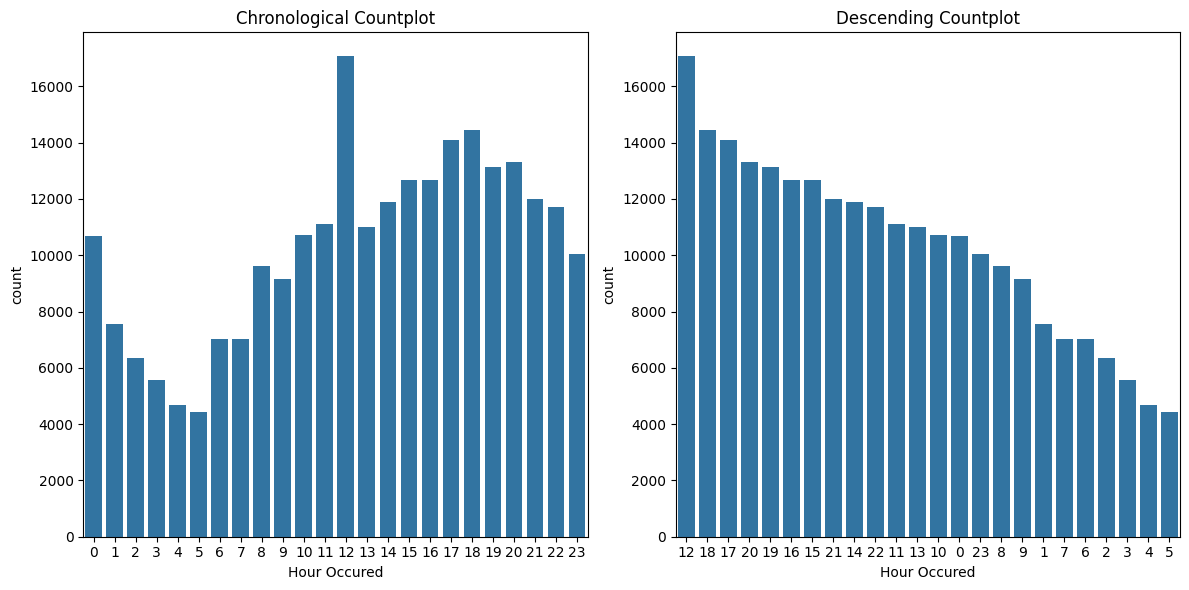

'The hour with the highest frequency of crimes is 12 at 17065 crimes reported in this data set out of a total of 247988'

<Figure size 640x480 with 0 Axes>

In [23]:
# Determine the type of object we are dealing with in the time occ column
print(f'TIME OCC type: {type(crimes["TIME OCC"].iloc[0])}')

# Create the Hour OCC feature which contains the hour the crime occured
crimes['TIME_OCC_HOUR'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M').dt.hour

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Count plot 1
sns.countplot(data=crimes, x='TIME_OCC_HOUR', ax=axes[0])
axes[0].set_title('Chronological Countplot')
axes[0].set_xlabel('Hour Occured')

# Count plot 2 
sns.countplot(data=crimes, x='TIME_OCC_HOUR', order=crimes['TIME_OCC_HOUR'].value_counts().index, ax=axes[1])
axes[1].set_title('Descending Countplot')
axes[1].set_xlabel('Hour Occured')

plt.tight_layout()
plt.show()
plt.clf()

# Find the hour associated with the highest number of crimes in the dataframe
peak_crime_hour = 12
f'The hour with the highest frequency of crimes is {peak_crime_hour} at {crimes["TIME_OCC_HOUR"].value_counts().loc[peak_crime_hour]} crimes reported in this data set out of a total of {crimes.shape[0]}'


## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

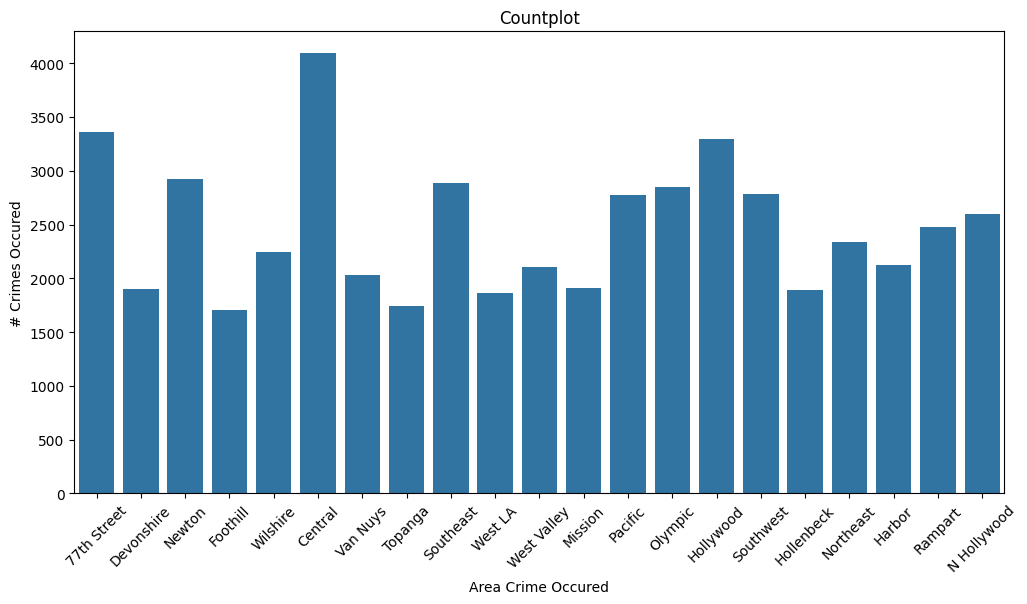

'The area with the highest frequency of crimes between the hours of 10pm and 4am is Central'

<Figure size 640x480 with 0 Axes>

In [24]:
# Subset the crime dataframe for crimes that occur between the hours of 10pm and 4 am
# This means they occur betweent he military time hours of 22-23 and 0-3

night_time_hours = [0,1,2,3,22,23]

night_time_crimes = crimes[crimes['TIME_OCC_HOUR'].isin(night_time_hours)]

fig, ax = plt.subplots(figsize=(12, 6))

# Count plot of crimes committed per area 
sns.countplot(data=night_time_crimes, x='AREA NAME')
ax.set_title('Countplot')
ax.set_xlabel('Area Crime Occured')
ax.set_ylabel('# Crimes Occured')
plt.xticks(rotation = 45)
plt.show()
plt.clf()

peak_night_crime_location = night_time_crimes['AREA NAME'].value_counts().idxmax()
f'The area with the highest frequency of crimes between the hours of 10pm and 4am is {peak_night_crime_location}'

## Identify the number of crimes committed against victims by age group:

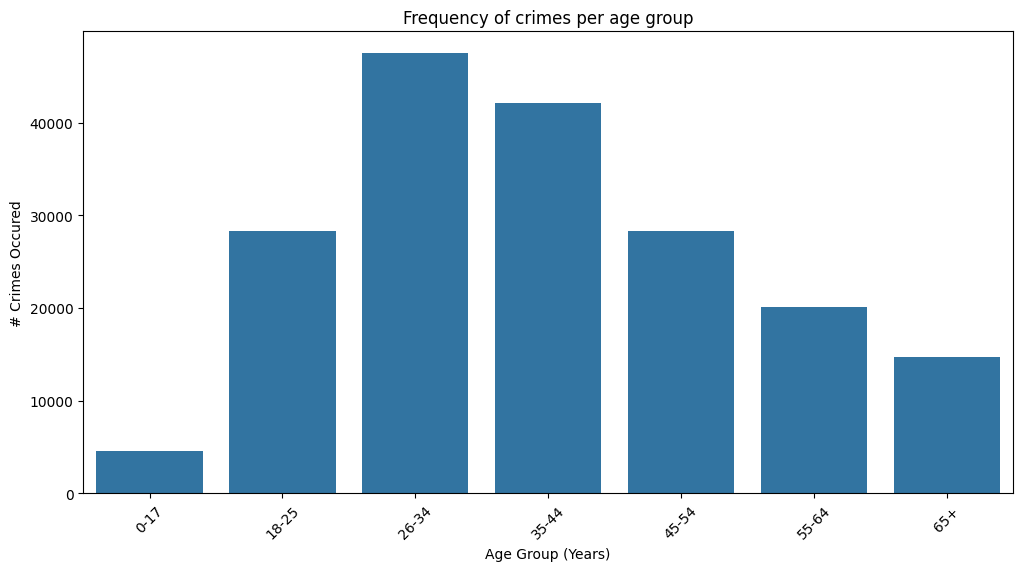

'According to the crimes dataframe, the most frequently victimized age group is 26-34'

In [25]:
# Create a list of the age ranges 
age_ranges = [0, 17, 25, 34, 44, 54, 64, np.inf]

# Create a list of labels for the age ranges
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Create the age group feature in the crimes data frame 
crimes['AGE_GROUP'] = pd.cut(crimes['Vict Age'], bins=age_ranges, labels=age_labels)

# Instatiate fig and ax  
fig, ax = plt.subplots(figsize=(12, 6))

# Count plot of crimes committed per area 
sns.countplot(data=crimes, x='AGE_GROUP')
ax.set_title('Frequency of crimes per age group')
ax.set_xlabel('Age Group (Years)')
ax.set_ylabel('# Crimes Occured')
plt.xticks(rotation = 45)
plt.show()

victim_ages = crimes['AGE_GROUP'].value_counts()
f'According to the crimes dataframe, the most frequently victimized age group is {victim_ages.idxmax()}'